# Build a prediction model for Heart Disease


## _1. Import Libraries_


In [222]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from scipy import stats
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)


## _2. Read Data_


In [223]:
data1 = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")
data1 = pd.DataFrame(data1)
data1.info()
print('Number of records and features in the dataset >> ' + str(data1.shape))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
Number of records and features in the dataset >> (303, 14)


**Check duplicate rows in data**


In [224]:
duplicate_rows = data1[data1.duplicated()]
print("Number of duplicate rows >> ", duplicate_rows.shape)


Number of duplicate rows >>  (1, 14)


**We have one duplicate row. Removing the duplicate row**


In [225]:
data1 = data1.drop_duplicates()
duplicate_rows = data1[data1.duplicated()]
print("Number of duplicate rows >> ", duplicate_rows.shape)


Number of duplicate rows >>  (0, 14)


**Looking for null values**


In [226]:
print("Null values >> \n" + str(data1.isnull() .sum()))


Null values >> 
age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


**Check if the other data is consistent**


In [227]:
data1.shape


(302, 14)

### 1. Detecting Outliers using IQR (InterQuartile Range)

- As there are no null values in data, we can proceed with the next steps. Detecting Outliers


<AxesSubplot:xlabel='thall'>

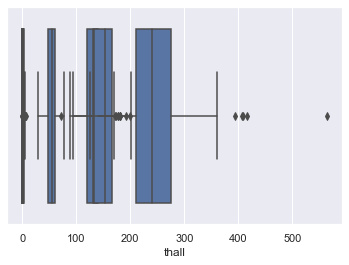

In [228]:

# No Outliers observed in 'age'
sns.boxplot(x=data1['age'])

# No outliers observed in sex data
sns.boxplot(x=data1['sex'])

# No outliers in 'cp'
sns.boxplot(x=data1['cp'])

# Some outliers are observed in 'trtbps'. They will be removed later
sns.boxplot(x=data1['trtbps'])

# Some outliers are observed in 'chol'. They will be removed later
sns.boxplot(x=data1['chol'])
sns.boxplot(x=data1['fbs'])
sns.boxplot(x=data1['restecg'])

# Outliers present in thalachh
sns.boxplot(x=data1['thalachh'])
sns.boxplot(x=data1['exng'])

# Outliers are present in 'OldPeak'
sns.boxplot(x=data1['oldpeak'])
sns.boxplot(x=data1['slp'])

# Outliers are present in 'caa'
sns.boxplot(x=data1['caa'])
sns.boxplot(x=data1['thall'])


### 1. Inter-Quartile Range

In IQR, the data points higher than the upper limit and lower than the lower limit are considered outliers.

- upper limit = Q3 + 1.5 \* IQR
- lower limit = Q1 – 1.5 \* IQR

We find the IQR for all features using the code snippet,


In [229]:
# Find the InterQuartile Range
Q1 = data1.quantile(0.25)
Q3 = data1.quantile(0.75)
IQR = Q3-Q1
print('\t InterQuartile Range \t')
print(IQR)
# Remove the outliers using IQR
data2 = data1[~((data1 < (Q1-1.5*IQR)) | (data1 > (Q3+1.5*IQR))).any(axis=1)]
data2.shape


	 InterQuartile Range 	
age         13.00
sex          1.00
cp           2.00
trtbps      20.00
chol        63.75
fbs          0.00
restecg      1.00
thalachh    32.75
exng         1.00
oldpeak      1.60
slp          1.00
caa          1.00
thall        1.00
output       1.00
dtype: float64


(228, 14)

### 2. Z – Score

If a Z-score is greater than 3, it implies that the data point differs from the other data points and hence is treated as an outlier


In [230]:
# Removing outliers using Z-score
z = np.abs(stats.zscore(data1))
data3 = data1[(z < 3).all(axis=1)]
data3.shape


(287, 14)

#### Correlation

After removing outliers from data, we will find the correlation between all the features.

Two types of correlation will be used here.

- Pearson Correlation
- Spearman Correlation


C:\Users\alper\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\matrix.py:302: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  mesh = ax.pcolormesh(self.plot_data, cmap=self.cmap, **kws)
C:\Users\alper\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\matrix.py:312: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = ax.figure.colorbar(mesh, cax, ax, **self.cbar_kws)


Text(0.5, 1.0, 'Pearson Correlation')

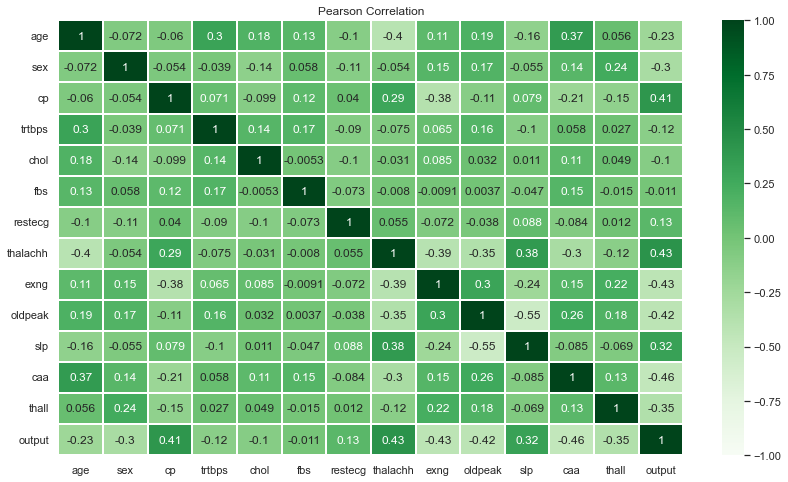

In [231]:
# Finding the correlation between variables
pearsonCorr = data3.corr(method='pearson')
spearmanCorr = data3.corr(method='spearman')
fig = plt.subplots(figsize=(14, 8))
sns.heatmap(pearsonCorr, vmin=-1, vmax=1,
            cmap="Greens", annot=True, linewidth=0.1)
plt.title("Pearson Correlation")


**Create mask for both correlation matrices**

- Pearson corr masking


C:\Users\alper\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\matrix.py:302: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  mesh = ax.pcolormesh(self.plot_data, cmap=self.cmap, **kws)
C:\Users\alper\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\matrix.py:312: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = ax.figure.colorbar(mesh, cax, ax, **self.cbar_kws)


Text(0.5, 1.0, 'Pearson Correlation')

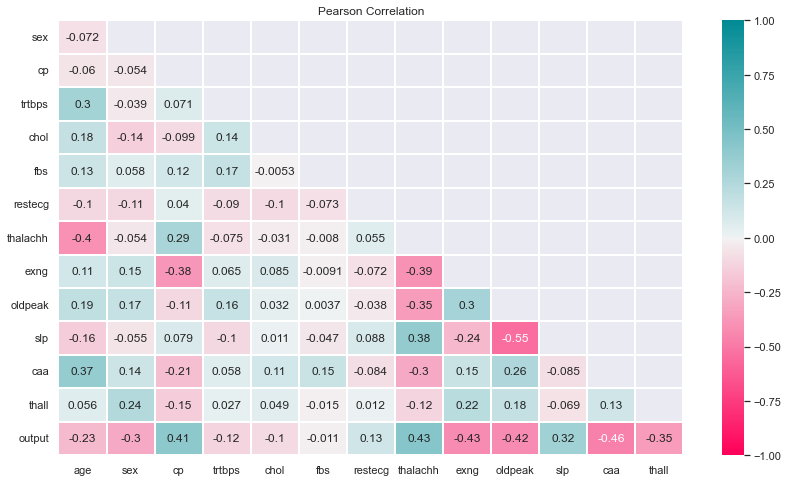

In [232]:
# Generating mask for upper triangle
maskP = np.triu(np.ones_like(pearsonCorr, dtype=bool))

# Adjust mask and correlation
maskP = maskP[1:, :-1]
pCorr = pearsonCorr.iloc[1:, :-1].copy()

# Setting up a diverging palette
cmap = sns.diverging_palette(0, 200, 150, 50, as_cmap=True)
fig = plt.subplots(figsize=(14, 8))
sns.heatmap(pCorr, vmin=-1, vmax=1, cmap=cmap,
            annot=True, linewidth=0.3, mask=maskP)
plt.title("Pearson Correlation")


- Spearman Correlation


C:\Users\alper\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\matrix.py:302: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  mesh = ax.pcolormesh(self.plot_data, cmap=self.cmap, **kws)
C:\Users\alper\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\matrix.py:312: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = ax.figure.colorbar(mesh, cax, ax, **self.cbar_kws)


Text(0.5, 1.0, 'Spearman Correlation')

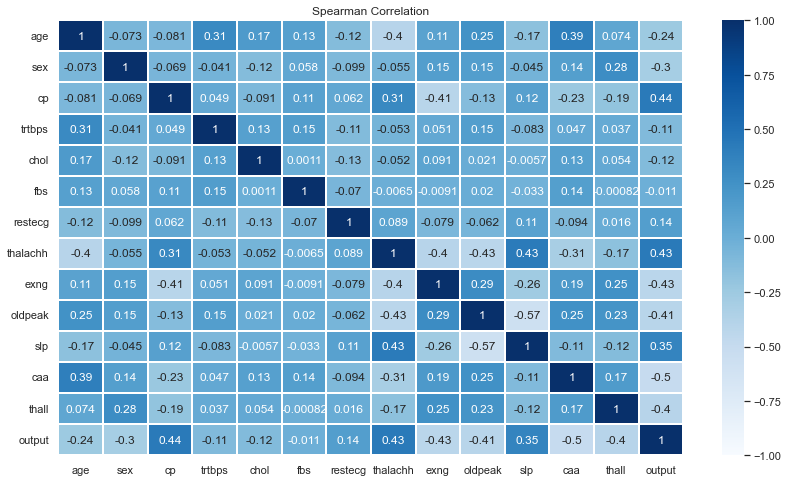

In [233]:
fig = plt.subplots(figsize=(14, 8))
sns.heatmap(spearmanCorr, vmin=-1, vmax=1,
            cmap="Blues", annot=True, linewidth=0.1)
plt.title("Spearman Correlation")


## Classification

Before implementing any classification algorithm, we will divide our dataset into training data and test data. I have used 70% of the data for training and the remaining 30% will be used for testing.


In [234]:
# From this we observe that the minimum correlation between output and other features in fbs,trtbps and chol
x = data3.drop("output", axis=1)
y = data3["output"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)


### 1. Logistic Regression Classifier

The code snippet used to build Logistic Regression Classifier is,


In [235]:
# Building classification models
names = ['Age', 'Sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg',
         'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']
#   ****************Logistic Regression*****************
logReg = LogisticRegression(random_state=0, solver='liblinear')
logReg.fit(x_train, y_train)
# Check accuracy of Logistic Regression
y_pred_logReg = logReg.predict(x_test)
# Model Accuracy
print("Accuracy of logistic regression classifier >> ",
      metrics.accuracy_score(y_test, y_pred_logReg))
# Removing the features with low correlation and checking effect on accuracy of model
x_train1 = x_train.drop("fbs", axis=1)
x_train1 = x_train1.drop("trtbps", axis=1)
x_train1 = x_train1.drop("chol", axis=1)
x_train1 = x_train1.drop("restecg", axis=1)
x_test1 = x_test.drop("fbs", axis=1)
x_test1 = x_test1.drop("trtbps", axis=1)
x_test1 = x_test1.drop("chol", axis=1)
x_test1 = x_test1.drop("restecg", axis=1)
logReg1 = LogisticRegression(
    random_state=0, solver='liblinear').fit(x_train1, y_train)
y_pred_logReg1 = logReg1.predict(x_test1)
print("nAccuracy of logistic regression classifier after removing features >> ",
      metrics.accuracy_score(y_test, y_pred_logReg1))


Accuracy of logistic regression classifier >>  0.8850574712643678
nAccuracy of logistic regression classifier after removing features >>  0.8620689655172413


### 2. Decision Tree Classifier

The code snippet used to build a decision tree is,


In [236]:
decTree = DecisionTreeClassifier(max_depth=6, random_state=0)
decTree.fit(x_train, y_train)
y_pred_decTree = decTree.predict(x_test)
print("Accuracy of Decision Trees >> ",
      metrics.accuracy_score(y_test, y_pred_decTree))

# Remove features which have low correlation with output (fbs, trtbps, chol)
x_train_dt = x_train.drop("fbs", axis=1)
x_train_dt = x_train_dt.drop("trtbps", axis=1)
x_train_dt = x_train_dt.drop("chol", axis=1)
x_train_dt = x_train_dt.drop("age", axis=1)
x_train_dt = x_train_dt.drop("sex", axis=1)
x_test_dt = x_test.drop("fbs", axis=1)
x_test_dt = x_test_dt.drop("trtbps", axis=1)
x_test_dt = x_test_dt.drop("chol", axis=1)
x_test_dt = x_test_dt.drop("age", axis=1)
x_test_dt = x_test_dt.drop("sex", axis=1)

decTree1 = DecisionTreeClassifier(max_depth=6, random_state=0)
decTree1.fit(x_train_dt, y_train)
y_pred_dt1 = decTree1.predict(x_test_dt)
print("Accuracy of decision Tree after removing features >> ",
      metrics.accuracy_score(y_test, y_pred_dt1))


Accuracy of Decision Trees >>  0.735632183908046
Accuracy of decision Tree after removing features >>  0.7816091954022989


### 3. Random Forest Classifier

Implement a random forest classifier using the code,


In [237]:
rf = RandomForestClassifier(n_estimators=500)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
print("Accuracy of Random Forest Classifier >> ",
      metrics.accuracy_score(y_test, y_pred_rf))

# Find the score of each feature in model and drop the features with low scores
f_imp = rf.feature_importances_
for i, v in enumerate(f_imp):
    print('Feature: %s, Score: %.5f' % (names[i], v))


Accuracy of Random Forest Classifier >>  0.8390804597701149
Feature: Age, Score: 0.09929
Feature: Sex, Score: 0.03081
Feature: cp, Score: 0.12283
Feature: trtbps, Score: 0.08442
Feature: chol, Score: 0.08079
Feature: fbs, Score: 0.00906
Feature: restecg, Score: 0.02134
Feature: thalachh, Score: 0.13299
Feature: exng, Score: 0.06644
Feature: oldpeak, Score: 0.10789
Feature: slp, Score: 0.05033
Feature: caa, Score: 0.09979
Feature: thall, Score: 0.09402


### 4. K Nearest Neighbours Classifier

Implement K nearest neighbor classifier and print the accuracy of the model.


In [238]:
knc = KNeighborsClassifier()
knc.fit(x_train, y_train)
y_pred_knc = knc.predict(x_test)
print("Accuracy of K-Neighbours classifier >> ",
      metrics.accuracy_score(y_test, y_pred_knc))


Accuracy of K-Neighbours classifier >>  0.7011494252873564


# Conclusion
### Models and their accuracy

In [239]:
print("Logistic Regression Classifier >> ",
      metrics.accuracy_score(y_test, y_pred_logReg1))
print("Decision Tree >> ", metrics.accuracy_score(y_test, y_pred_dt1))
print("Random Forest Classifier >> ", metrics.accuracy_score(y_test, y_pred_rf))
print("K Neighbours Classifier >> ", metrics.accuracy_score(y_test, y_pred_knc))


Logistic Regression Classifier >>  0.8620689655172413
Decision Tree >>  0.7816091954022989
Random Forest Classifier >>  0.8390804597701149
K Neighbours Classifier >>  0.7011494252873564
